In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Feature selection
from sklearn.feature_selection import SelectFromModel

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [2]:
# Replace this with the path to your CSV file
file_path = r"C:\Users\ASUS\OneDrive\Desktop\machine learning udemy\early diabetes prediction\dataset\diabetes_risk_prediction_dataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df['class'] = df['class'] ==  'Positive'

In [5]:
df['class'].value_counts()

class
True     320
False    200
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'] ==  'Male'

In [7]:
yesorno = {'Yes': True, 'No': False}

In [8]:
df = df.replace(yesorno)

In [9]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


In [10]:
df.to_csv(r'C:\Users\ASUS\OneDrive\Desktop\machine learning udemy\early diabetes prediction\dataset\diabetes_clean.csv', index=False)


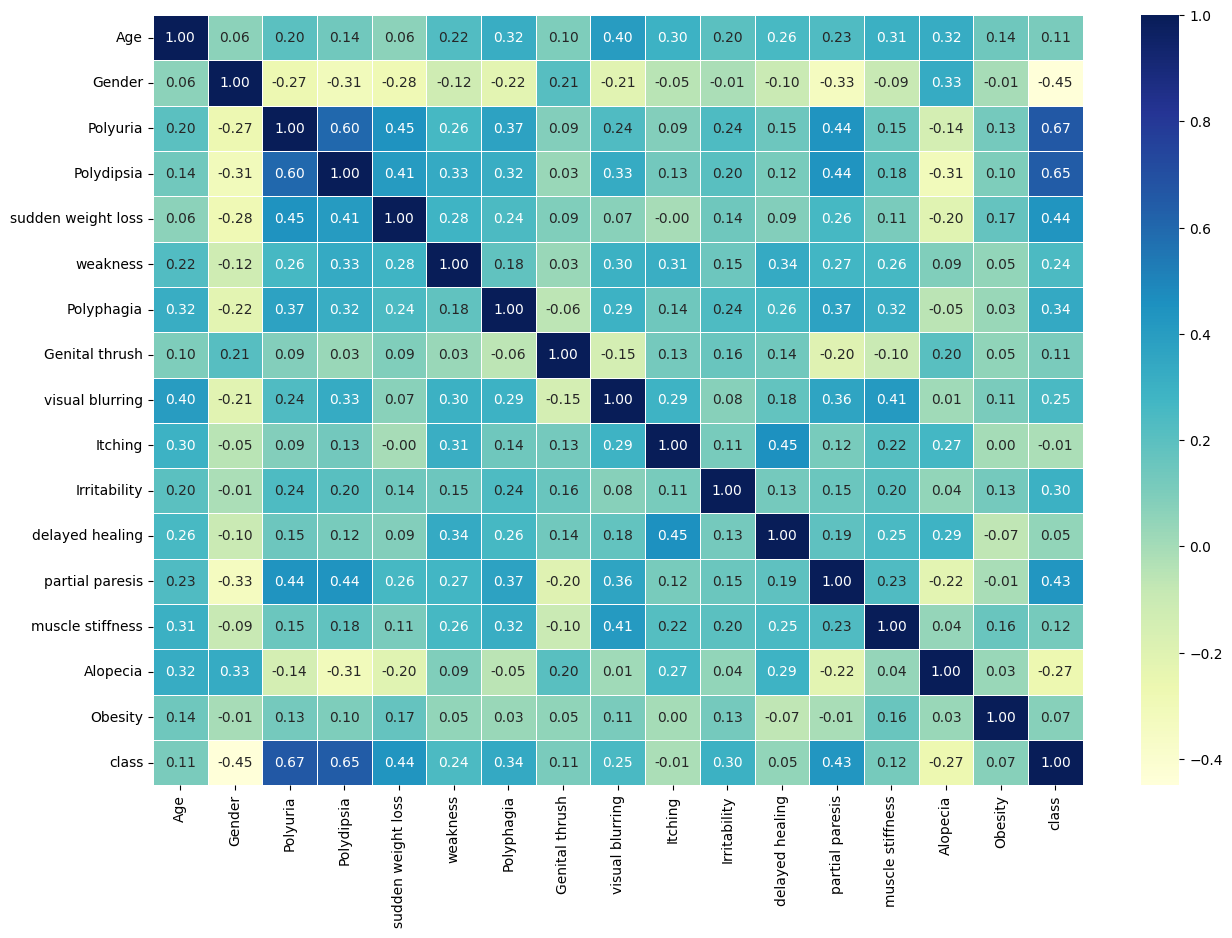

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [12]:
# Everything except target variable
X = df.drop("class", axis=1)

# Target variable
y = df['class'].values

In [13]:
#Decision tree
#Prune features using decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

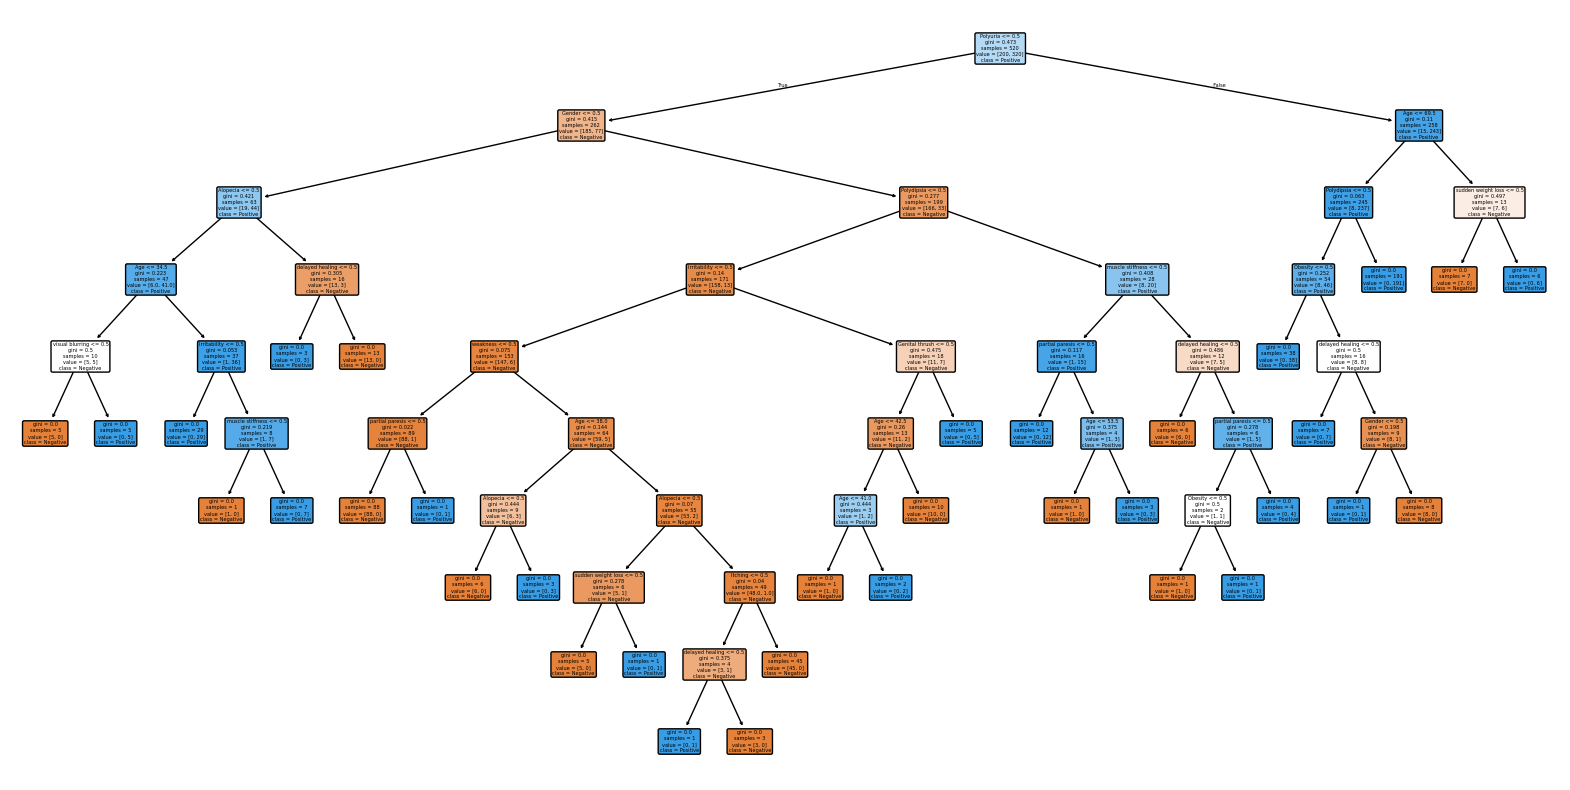

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True)
plt.show()

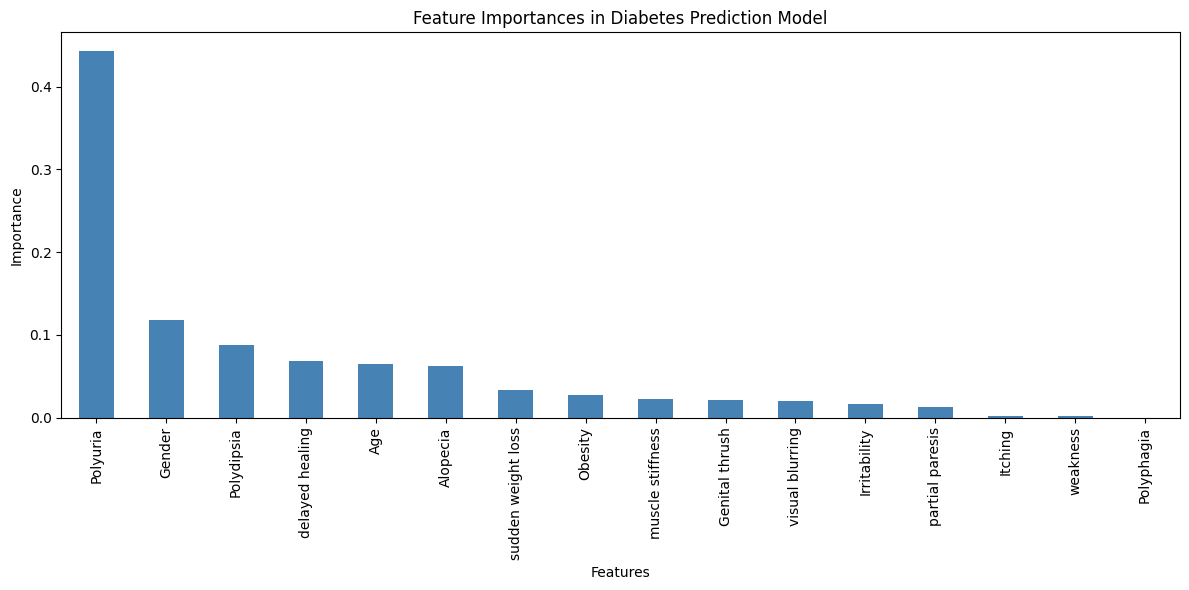

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size
pd.Series(clf.feature_importances_, index=df.columns[:len(df.columns)-1]).sort_values(ascending=False).plot.bar(color='steelblue')
plt.title('Feature Importances in Diabetes Prediction Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.feature_selection import RFECV

clf = DecisionTreeClassifier()
trans = RFECV(clf)
X_trans = trans.fit_transform(X, y)
columns_retained_RFECV = df.iloc[:, :-1].columns[trans.get_support()].values
columns_retained_RFECV

array(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'Irritability', 'delayed healing', 'muscle stiffness', 'Alopecia',
       'Obesity'], dtype=object)

In [17]:
X_trans

array([[40,  1,  0, ...,  1,  1,  1],
       [58,  1,  0, ...,  0,  1,  0],
       [41,  1,  1, ...,  1,  1,  0],
       ...,
       [58,  0,  1, ...,  1,  0,  1],
       [32,  0,  0, ...,  0,  1,  0],
       [42,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [18]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [19]:
# Retrain the classifier on the selected features in training set
X_train_selected = X_train  # Since X_trans already contains selected features
clf.fit(X_train_selected, y_train)

# Transform the test set to include only selected features
X_test_selected = X_test  # Similarly, X_test already contains selected features

# Evaluate on test set
y_pred = clf.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.89      0.97      0.93        33
        True       0.99      0.94      0.96        71

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)  # Fit using the selected features and training data

# Output the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 2}


In [21]:
# Retrain with optimal parameters
optimal_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
optimal_clf.fit(X_train_selected, y_train)
# Evaluate on the test set
y_pred = optimal_clf.predict(X_test_selected)
print(classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimal_clf, X_train_selected, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


              precision    recall  f1-score   support

       False       0.89      0.97      0.93        33
        True       0.99      0.94      0.96        71

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104

Accuracy: 0.96 (+/- 0.06)


In [22]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000), 
          "Random Forest": RandomForestClassifier()}

In [23]:
# define method to fit multiple models
def multi_fit(models, X_train, y_train):
    # Random seed for reproducible results
    np.random.seed(42)
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

In [24]:
# fit all 3 models
model_metrics = multi_fit(models=models,
                          X_train=X_train,
                          y_train=y_train)

In [25]:


# Create function to generate cross validated metrics for multiple models
def cross_validated_metrics(models, X,  y):
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores totals
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # make a list to hold collected scores for each model
        collected_scores = {}
        # gather mean of cross validated score for a variety of metrics
        for metric in ['accuracy', 'precision', 'recall']:
            collected_scores[metric] = np.mean(cross_val_score(model,
                                                               X,
                                                               y,
                                                               cv=5, # 5-fold cross-validation
                                                               scoring=metric)) # loop through scoring methods
        model_scores[name] = collected_scores
    return model_scores



In [26]:
model_metrics = cross_validated_metrics(models=models,
                                       X=X_trans,
                                       y=y)
model_metrics

{'KNN': {'accuracy': 0.875,
  'precision': 0.9383215249662618,
  'recall': 0.853125},
 'Logistic Regression': {'accuracy': 0.9153846153846155,
  'precision': 0.9309670063852679,
  'recall': 0.934375},
 'Random Forest': {'accuracy': 0.9673076923076923,
  'precision': 0.9702317290552586,
  'recall': 0.98125}}

In [27]:
# Fit model and get baseline score
np.random.seed(42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# cross validated accuracy score for random forest
cv_acc_rf = np.mean(cross_val_score(rf,
                                       X_trans,
                                       y,
                                       cv=50, # 50-fold cross-validation
                                       scoring="accuracy")) # precision as scoring
cv_acc_rf

0.9794545454545454

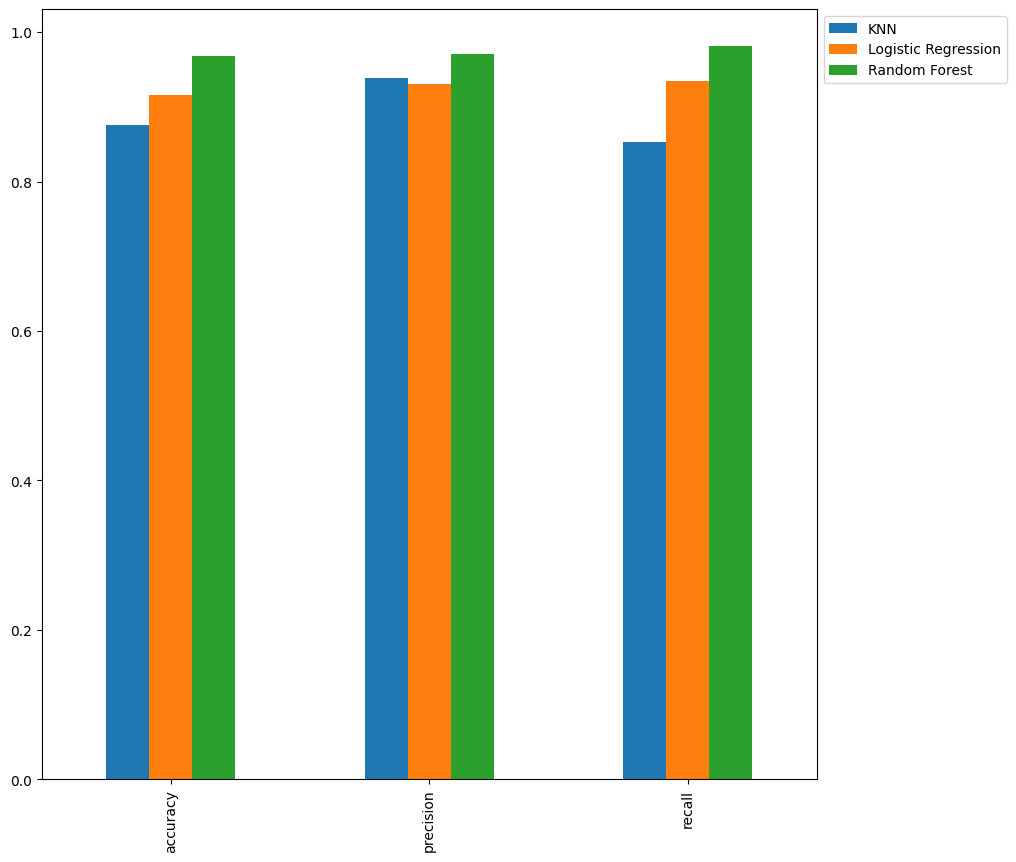

In [28]:
compare_metrics = pd.DataFrame(model_metrics)

compare_metrics.plot.bar(figsize=(10, 10)).legend(bbox_to_anchor=(1,1))

In [29]:
# Initialize SVM classifier
svm_clf = SVC()

In [30]:
import joblib

# define method to fit multiple models
def multi_fit(models, X_train, y_train):
    # Random seed for reproducible results
    np.random.seed(42)
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Save the model using joblib after training
        joblib.dump(model, f'{name}_diabetes_model.pkl')
        print(f"Model {name} saved as {name}_diabetes_model.pkl")



In [32]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Assuming you have already split your data into X_train and y_train
# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(rf_model, 'random_forest_diabetes_model.pkl')

print("Random Forest model saved successfully!")



Random Forest model saved successfully!


In [33]:
import joblib

# Train the model (assuming it's already trained in the notebook)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(rf, 'diabetes_model.pkl')

print("Model saved successfully!")


Model saved successfully!
